In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import optuna
import shap

from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


d:\01 Professional software operation\minicondaa\envs\wone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = 'TC-figure'

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"文件夹 {folder_path} 已创建。")

In [3]:
df = pd.read_csv("TC_填充.csv",  dtype={'DIPOCE': str, 'BA_Code': str, 'Cata_Code': str, 'FM_N': str})
df

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,R,CHS,AB_Mix_T,Q,Cata_Code,MCS,TC_Method,TC_t,Closed_CC,TC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,1.83,59.700000,5.05,0.0,100000,108.600,1,283.15,90.8,24.36
1,0100010000,31.5,440.000000,3.426129,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9,28.74
2,0100100100,31.5,429.326712,3.644699,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9,28.72
3,0100100100,31.5,418.118624,3.664067,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2,28.59
4,0100100100,31.5,406.184223,3.594375,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9,28.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,1.10,57.662997,5.00,48.0,100000,269.211,1,283.15,20.4,37.01
284,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,1.10,55.396967,5.00,48.0,100000,264.406,1,283.15,15.9,38.79
285,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,1.10,54.317040,5.00,48.0,100000,264.088,1,283.15,19.5,39.74
286,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,1.10,53.980672,5.00,48.0,100000,260.738,1,283.15,34.5,40.45


In [4]:

y = df['TC']

X = df.drop(["TC"], axis=1)
X

,DIPOCE,DI_NCO,PO_HV,PO_f,BA_Code,BA_Mn,PO_Phr,BA_Phr,FS_Phr,Cata_Phr,...,Yield,R,CHS,AB_Mix_T,Q,Cata_Code,MCS,TC_Method,TC_t,Closed_CC
0,0110100000,31.0,367.991736,4.464132,1000,18.0,67.567568,2.182432,1.013514,1.013514,...,96.884711,1.83,59.700000,5.05,0.0,100000,108.600,1,283.15,90.8
1,0100010000,31.5,440.000000,3.426129,1000,18.0,50.676157,1.494662,1.010676,0.455516,...,97.017857,1.10,58.400000,10.00,0.0,100100,310.000,1,297.15,88.9
2,0100100100,31.5,429.326712,3.644699,1000,18.0,32.931727,0.975330,0.659782,0.295468,...,97.377587,1.10,63.500000,10.00,0.0,100100,220.000,1,297.15,89.9
3,0100100100,31.5,418.118624,3.664067,1000,18.0,30.906059,0.990550,0.617009,0.278488,...,97.428971,1.10,64.600000,10.00,0.0,100100,210.000,1,297.15,84.2
4,0100100100,31.5,406.184223,3.594375,1000,18.0,29.056604,0.862534,0.582210,0.264151,...,97.478380,1.10,65.000000,10.00,0.0,100100,280.000,1,297.15,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0100010000,31.0,416.000000,2.000000,1000,18.0,73.421439,2.276065,1.101322,0.367107,...,96.859603,1.10,57.662997,5.00,48.0,100000,269.211,1,283.15,20.4
284,0100010000,31.0,416.000000,2.000000,1000,18.0,80.515298,1.328502,1.207729,0.402576,...,98.229830,1.10,55.396967,5.00,48.0,100000,264.406,1,283.15,15.9
285,0100010000,31.0,416.000000,2.000000,1000,18.0,84.104289,0.849453,1.261564,0.420521,...,98.887437,1.10,54.317040,5.00,48.0,100000,264.088,1,283.15,19.5
286,0100010000,31.0,416.000000,2.000000,1000,18.0,85.251492,0.699062,1.278772,0.426257,...,99.089386,1.10,53.980672,5.00,48.0,100000,260.738,1,283.15,34.5


In [5]:
params = {'iterations':1400,
            'depth': 5,
            'learning_rate': 0.016,
            'l2_leaf_reg': 3.4,
            'bagging_temperature': 0.36,
            'border_count': 142,
      }

In [6]:
# 定义 RSE 计算函数
def calculate_rse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - y_mean) ** 2)
    rse = np.sqrt(numerator / denominator) if denominator != 0 else np.nan
    return rse

# 定义评估函数
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    rse = calculate_rse(y_true, y_pred)
    return r2, mae, mse, rmse, rse

# 设置随机种子范围
random_seeds = range(0, 100)

# 评估结果列表
scores = []

# 多种子 5 折交叉验证
for seed in random_seeds:
    print(f"Evaluating with Random Seed: {seed}")
    kf = KFold(n_splits=3, shuffle=True, random_state=seed)

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = CatBoostRegressor(**params, random_seed=seed, verbose=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2, mae, mse, rmse, rse = evaluate_model(y_test, y_pred)

        scores.append({
            "Seed": seed,
            "Fold": fold_idx,
            "R²": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "RSE": rse
        })

# 转换为 DataFrame
score_df1 = pd.DataFrame(scores)


Evaluating with Random Seed: 0
Evaluating with Random Seed: 1
Evaluating with Random Seed: 2
Evaluating with Random Seed: 3
Evaluating with Random Seed: 4
Evaluating with Random Seed: 5
Evaluating with Random Seed: 6
Evaluating with Random Seed: 7
Evaluating with Random Seed: 8
Evaluating with Random Seed: 9
Evaluating with Random Seed: 10
Evaluating with Random Seed: 11
Evaluating with Random Seed: 12
Evaluating with Random Seed: 13
Evaluating with Random Seed: 14
Evaluating with Random Seed: 15
Evaluating with Random Seed: 16
Evaluating with Random Seed: 17
Evaluating with Random Seed: 18
Evaluating with Random Seed: 19
Evaluating with Random Seed: 20
Evaluating with Random Seed: 21
Evaluating with Random Seed: 22
Evaluating with Random Seed: 23
Evaluating with Random Seed: 24
Evaluating with Random Seed: 25
Evaluating with Random Seed: 26
Evaluating with Random Seed: 27
Evaluating with Random Seed: 28
Evaluating with Random Seed: 29
Evaluating with Random Seed: 30
Evaluating with Ra

In [7]:
# 计算每个种子的 R² 方差
r2_var_by_seed = score_df1.groupby("Seed")["R²"].var(ddof=1).reset_index()
r2_var_by_seed.columns = ["Seed", "R2_Variance"]
r2_var_sorted = r2_var_by_seed.sort_values(by="R2_Variance")

# 输出最稳定与最不稳定的种子，根据方差
print("🎯 最稳定的5个种子：")
print(r2_var_sorted.head())

print("\n⚠️ 最不稳定的5个种子：")
print(r2_var_sorted.tail())


🎯 最稳定的5个种子：
    Seed  R2_Variance
39    39     0.000028
99    99     0.000034
0      0     0.000069
77    77     0.000090
58    58     0.000101

⚠️ 最不稳定的5个种子：
    Seed  R2_Variance
38    38     0.005305
78    78     0.006029
81    81     0.007896
91    91     0.008863
49    49     0.009099


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16164\1142677326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seed', y='R2_Variance', data=r2_var_sorted, palette='viridis')


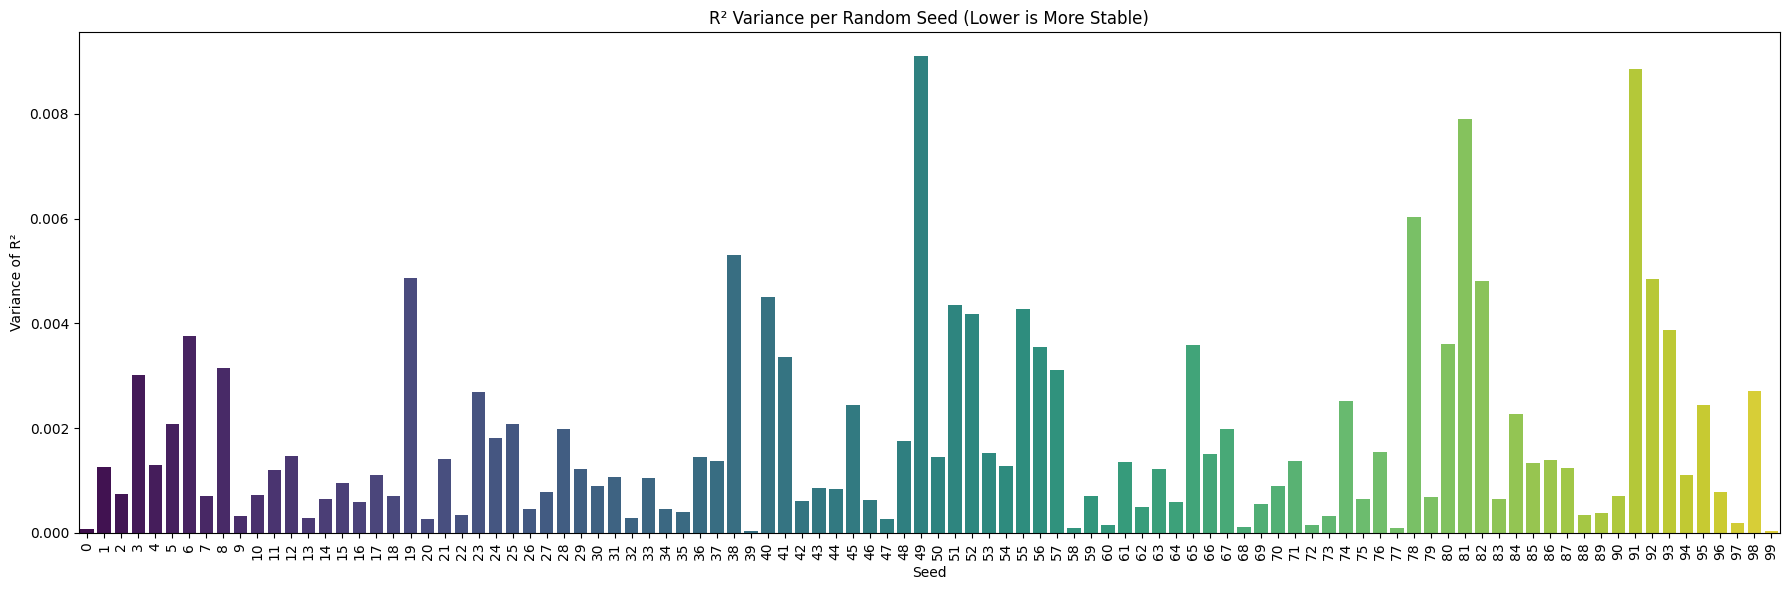

In [8]:
# 绘制种子方差柱状图
plt.figure(figsize=(18, 6))
sns.barplot(x='Seed', y='R2_Variance', data=r2_var_sorted, palette='viridis')
plt.title('R² Variance per Random Seed (Lower is More Stable)')
plt.xlabel('Seed')
plt.ylabel('Variance of R²')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


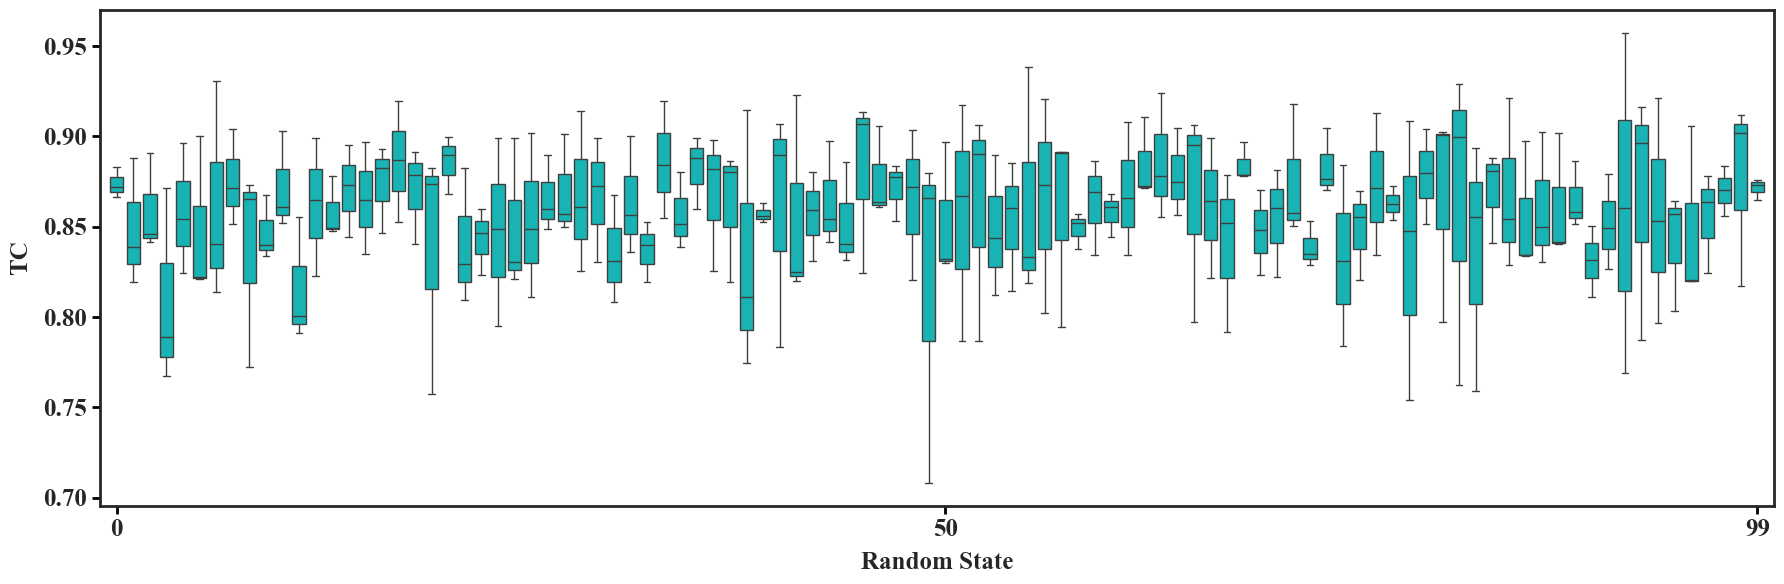

In [9]:
plt.figure(figsize=(18, 6))
sns.set(style="white", palette="muted", font_scale=1)

sns.boxplot(x='Seed', y='R²', data=score_df1, color='#00CDCD', linewidth=1, width=0.8, fliersize=5 )

# 设置横坐标仅显示特定的种子编号
plt.xticks(ticks=[0, 50, 99], labels=['0', '50', '99'], fontsize=18, fontname='Times New Roman', weight='bold')
plt.xlim(-1, 100)  # 设置x轴范围
plt.yticks(fontsize=18, fontname='Times New Roman', weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=6, width=2, color='black', bottom=True, top=False, left=True, right=False)

# 设置标题和标签
plt.xlabel('Random State', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)
plt.ylabel('TC', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)

# 设置边框粗细，比如加粗到2
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

# 去除顶部和右侧边框
# sns.despine()

plt.tight_layout()
plt.show()


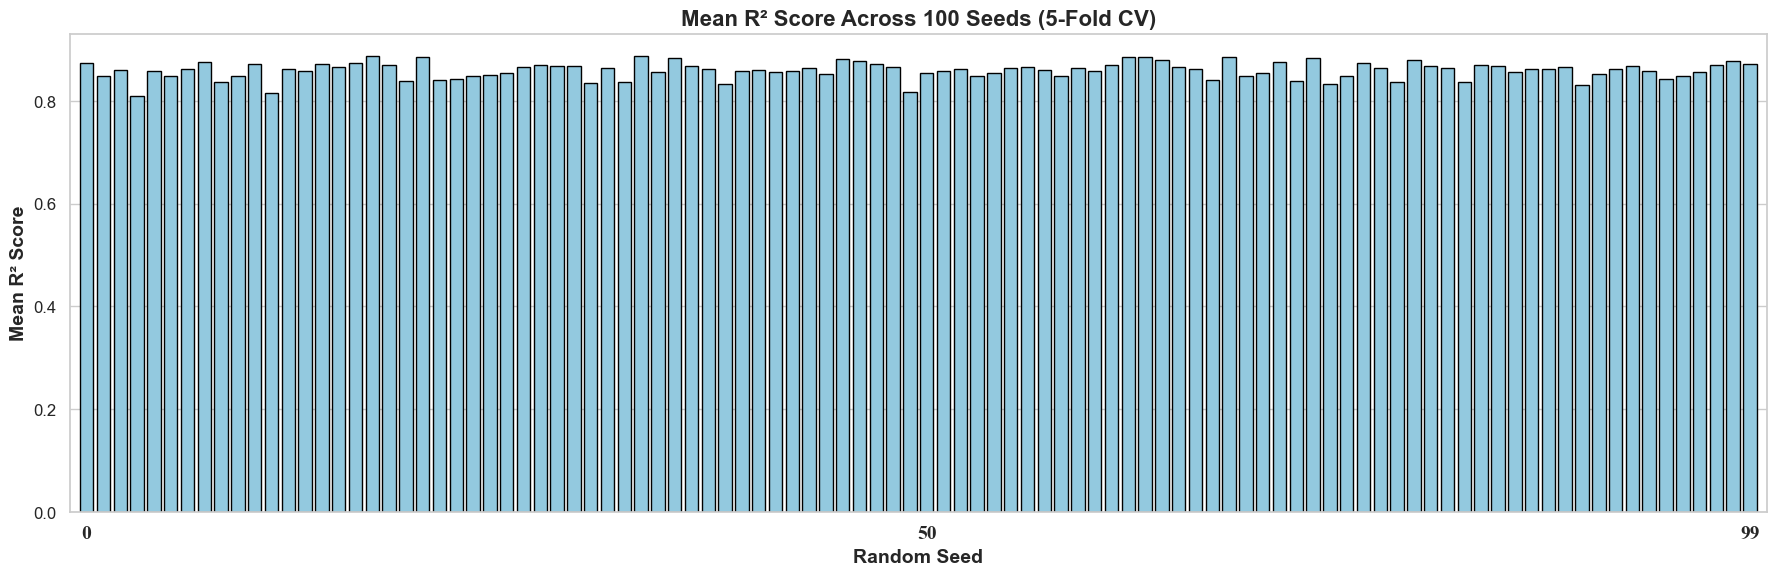

In [10]:
# 计算每个种子的平均 R² 值
mean_r2_df = score_df1.groupby('Seed', as_index=False)['R²'].mean()

# 设置绘图风格
sns.set(style="whitegrid", font_scale=1.2)

# 创建柱状图
plt.figure(figsize=(18, 6))
sns.barplot(x='Seed', y='R²', data=mean_r2_df, color='skyblue', edgecolor='black')

# 设置坐标轴范围和刻度
plt.xlim(-1, 100)
plt.xticks(ticks=[0, 50, 99],  labels=['0', '50', '99'],  fontsize=14,  fontname='Times New Roman',  weight='bold')
plt.yticks(fontsize=12)

# 设置标题和轴标签
plt.title('Mean R² Score Across 100 Seeds (5-Fold CV)', fontsize=16, fontweight='bold')
plt.xlabel('Random Seed', fontsize=14, fontweight='bold')
plt.ylabel('Mean R² Score', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

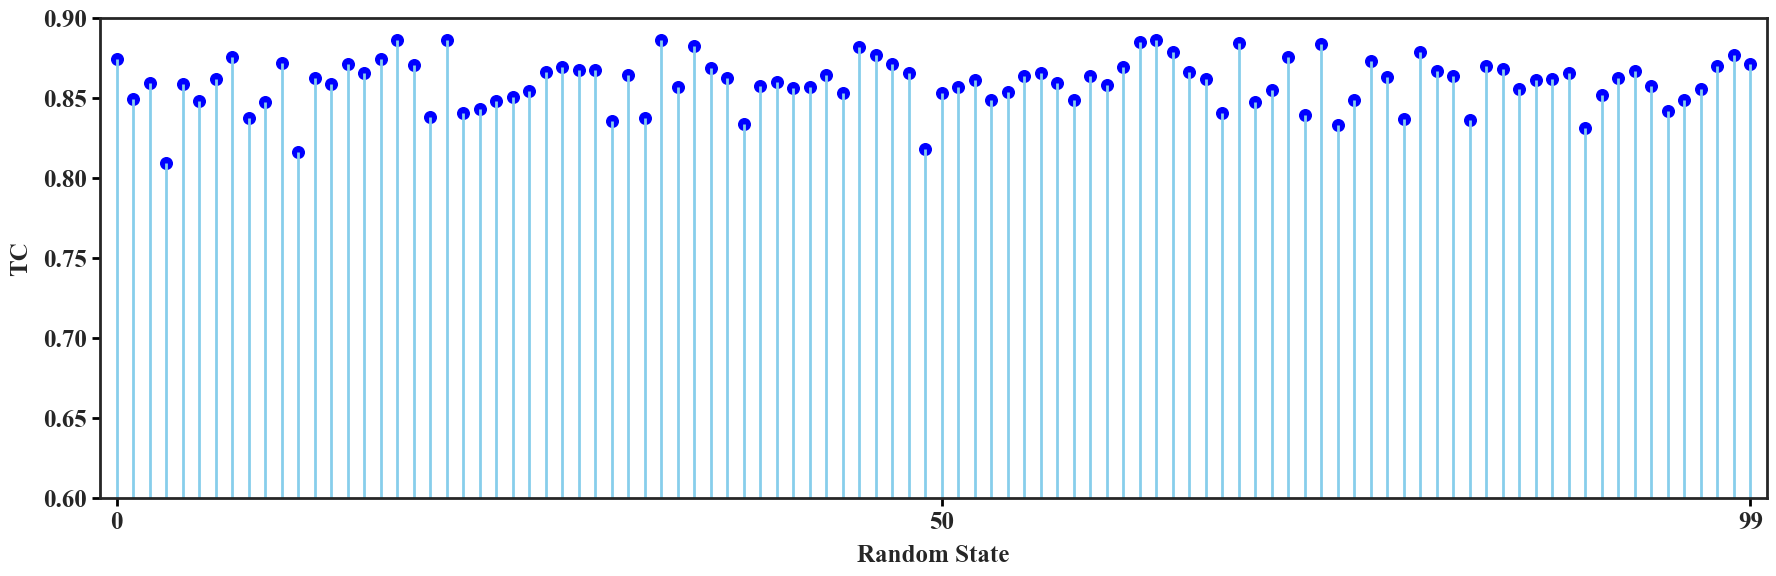

In [11]:
# 设置绘图风格
sns.set(style="white", font_scale=1.2)

# 创建棒棒糖图
plt.figure(figsize=(18, 6))

# 画线（棒棒糖杆） -> 垂直线，从 y=0 到 y=R2
plt.vlines(x=mean_r2_df['Seed'], ymin=0, ymax=mean_r2_df['R²'], color='skyblue', linewidth=2)

# 画点（棒棒糖头）
plt.scatter(mean_r2_df['Seed'], mean_r2_df['R²'], color='blue', s=70)

# 设置横坐标范围和刻度
plt.xticks(ticks=[0, 50, 99], labels=['0', '50', '99'], fontsize=18, fontname='Times New Roman', weight='bold')
plt.xlim(-1, 100)
plt.ylim(0.6, 0.9) # 设置x轴范围
plt.yticks(fontsize=18, fontname='Times New Roman', weight='bold')
plt.tick_params(axis='both', which='both', direction='out', length=6, width=2, color='black', bottom=True, top=False, left=True, right=False)

# 设置标题和标签
plt.xlabel('Random State', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)
plt.ylabel('TC', fontsize=18, fontname='Times New Roman', weight='bold',labelpad=8)

# 设置边框粗细，比如加粗到2
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
# 去除顶部和右侧边框
# sns.despine()
plt.tight_layout()
plt.show()

In [12]:
score_df1.insert(0, 'Feature', 'TC')  
score_df1.to_csv('TC-平行实验-3.csv', index=False)